In [1]:
'''
Explicacion->
He usado el dataset CIFAR10, con el cual contamos con 60.000 imagenes, 50000 imagenes de entrenamiento y 10000 de test.

Mas informacio- https://www.cs.toronto.edu/~kriz/cifar.html

Basicamente trato de entrenar la red convolucional para el reconocomiento y clasificacion 
de 10 tipos de categorias diferentes entre todas las imagenes.

Como se puede observar, he probado varios modelos(incluyendo algunos que borré, antes de realizar data aumentation),
y el mejor resultado que he llegado a obtener es en el que dejo como "modelo 1", con un Accuracy: 76.58% en la prueba uno y 
Accuracy: 77.46% en la prueba dos. Ejecutando la primera con un learning rate de 0.01 y 10 epocas, y en el segundo caso, 0.001
y 30 epocas.

Como se puede observar en el codigo, se usan tambien diferentes tipos de data aumentation, junto lel dropout entre capas 
que se pide en la tarea de la entrega.

Adjunto ambos modelos en la propia entrega.
'''

'\nExplicacion->\n'

In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [49]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
import os
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers



In [43]:
#cargamos datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

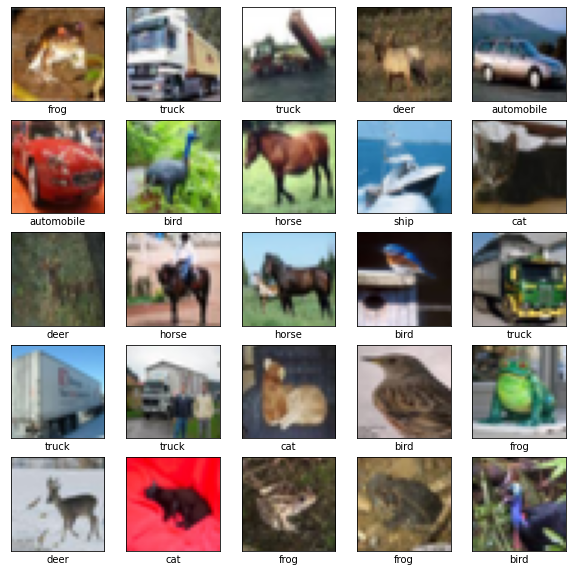

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].astype(numpy.uint8), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Preparamos los datos

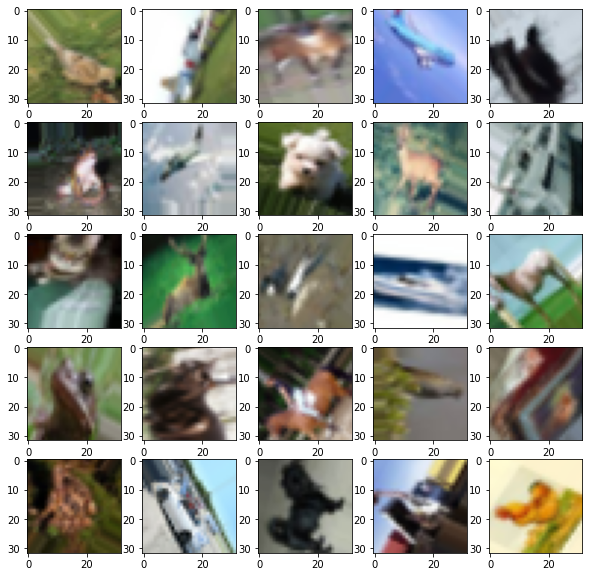

(50000, 32, 32, 3)


In [46]:
'''
(img_train, lab_train), (img_test, lab_test) = cifar10.load_data()

print (img_train.shape)
img_train = img_train.reshape((50000, 32, 32, 3))
img_train = img_train.astype('float32') / 255

img_test = img_test.reshape((10000, 32, 32, 3))
img_test = img_test.astype('float32') / 255

lab_train = to_categorical(lab_train)
lab_test = to_categorical(lab_test)
num_classes = y_test.shape[1]
'''

# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
    )
datagen.fit(X_train)


# see example augmentation images
plt.figure(figsize=(10,10))
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=25):
    for i in range(0,25):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i].astype(numpy.uint8))
    plt.show()
    break
print (X_train.shape)

num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

preparamos un modelo de CNN

In [59]:
'''
-----------Modelo 1 prueba 1
Epoch 10/10
391/391 [==============================] - 196s 501ms/step - loss: 0.7126 - 
accuracy: 0.7639 - val_loss: 0.7235 - val_accuracy: 0.7658
Accuracy: 76.58%
lrate = 0.01
epochs = 10

-----------Modelo 1 prueba 2
Epoch 30/30
391/391 [==============================] - 199s 509ms/step - loss: 0.6514 - 
accuracy: 0.7814 - val_loss: 0.6832 - val_accuracy: 0.7746
Accuracy: 77.46%
lrate = 0.001
epochs = 30



'''

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))



'''
-----------Modelo 2 prueba 1
#Epoch 10/10
#391/391 [==============================] - 58s 148ms/step - loss: 0.9433 - 
#accuracy: 0.6665 - val_loss: 0.9294 - val_accuracy: 0.6741
#Accuracy: 67.41%
lrate = 0.01

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
'''


'''
-----------Modelo 3 prueba 1
#Epoch 10/10
#196/196 [==============================] - 138s 702ms/step - loss: 1.0652 - 
#accuracy: 0.6204 - val_loss: 1.0220 - val_accuracy: 0.6375
#Accuracy: 63.75%
lrate = 0.01

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
'''

# Compilamos el modelo
lrate = 0.01
epochs = 10
 
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)       

In [60]:
# Ajustamos el modelo
model_log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/30
391/391 [==============================] - 196s 501ms/step - loss: 2.0723 - accuracy: 0.3807 - val_loss: 1.4540 - val_accuracy: 0.5110
Epoch 2/30
391/391 [==============================] - 197s 503ms/step - loss: 1.4980 - accuracy: 0.5068 - val_loss: 1.2871 - val_accuracy: 0.5582
Epoch 3/30
391/391 [==============================] - 195s 500ms/step - loss: 1.2949 - accuracy: 0.5668 - val_loss: 1.2144 - val_accuracy: 0.5963
Epoch 4/30
391/391 [==============================] - 196s 500ms/step - loss: 1.1699 - accuracy: 0.6063 - val_loss: 1.0991 - val_accuracy: 0.6254
Epoch 5/30
391/391 [==============================] - 196s 502ms/step - loss: 1.0988 - accuracy: 0.6283 - val_loss: 1.0745 - val_accuracy: 0.6318
Epoch 6/30
391/391 [==============================] - 196s 501ms/step - loss: 1.0376 - accuracy: 0.6491 - val_loss: 1.0000 - val_accuracy: 0.6644
Epoch 7/30
391/391 [==============================] - 195s 499ms/step - loss: 0.9951 - accuracy: 0.6647 - val_loss: 1.0212 -

In [62]:
# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 6s 21ms/step - loss: 0.6832 - accuracy: 0.7746
Accuracy: 77.46%


veamos metricas

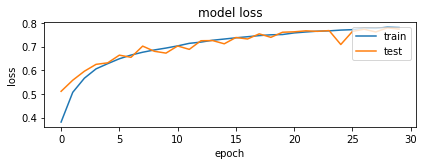

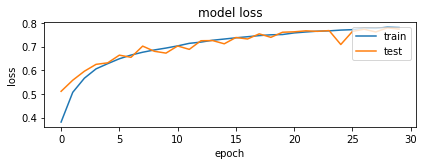

In [63]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

guardamos el modelo

In [58]:
#Save the model
# serialize model to JSON
'''
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")
'''

Saved model to disk
